In [1]:
import os
import tools
import numpy as np
import pandas as pd
import scanpy as sc

sc.logging.print_header()

scanpy==1.8.2 anndata==0.7.8 umap==0.5.2 numpy==1.20.3 scipy==1.7.1 pandas==1.3.4 scikit-learn==1.0.1 statsmodels==0.12.2 python-igraph==0.9.8 pynndescent==0.5.5


In [2]:
os.chdir('/lustre/scratch117/cellgen/team297/kt16/COVID_imperial_renal')

In [3]:
adata = sc.read_h5ad('h5ad/df.fil3_gex_kt.h5ad')
adata

AnnData object with n_obs × n_vars = 916806 × 33559
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ADT', 'nFeature_ADT', 'nCount_ADT_raw', 'nFeature_ADT_raw', 'nCount_RNA_raw', 'nFeature_RNA_raw', 'soupxOnAdt', 'soupxOnRna', 'percentMito', 'exclude', 'centre', 'pool', 'tcrId', 'bcrId', 'celltypist_broad_predLabel', 'celltypist_broad_maxPredProb', 'haniffa_broad_predLabel', 'haniffa_broad_maxPredProb', 'yoshida_broad_predLabel', 'yoshida_broad_maxPredProb', 'celltypist_detailed_predLabel', 'celltypist_detailed_maxPredProb', 'yoshida_detailed_predLabel', 'yoshida_detailed_maxPredProb', 'seurat_clusters', 'RNA_sequencing_saturation', 'pool_factor', 'RNA_readsConfidentlyOnTranscriptome', 'RNA_readsConfidentlyOnGenome', 'RNA_readsOnGenome', 'RNA_Q30readsBarcode', 'RNA_Q30readsRead', 'RNA_Q30readsUmi', 'rna_snn_res.4', 'rna_snn_res.0.5', 'rna_snn_res.0.1', 'harmony_snn_res.4', 'yoshida_broad_predLabel_majorVote', 'harmony_snn_res.0.5', 'harmony_snn_res.0.1', 'cell_type_compartm

In [4]:
bdata = sc.read_h5ad('h5ad/df.fil3_gex_bcells_no_CLL_vdj.h5ad')
bdata

AnnData object with n_obs × n_vars = 70501 × 318
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ADT', 'nFeature_ADT', 'nCount_ADT_raw', 'nFeature_ADT_raw', 'nCount_RNA_raw', 'nFeature_RNA_raw', 'soupxOnAdt', 'soupxOnRna', 'percentMito', 'exclude', 'centre', 'pool', 'tcrId', 'bcrId', 'celltypist_broad_predLabel', 'celltypist_broad_maxPredProb', 'haniffa_broad_predLabel', 'haniffa_broad_maxPredProb', 'yoshida_broad_predLabel', 'yoshida_broad_maxPredProb', 'celltypist_detailed_predLabel', 'celltypist_detailed_maxPredProb', 'yoshida_detailed_predLabel', 'yoshida_detailed_maxPredProb', 'seurat_clusters', 'RNA_sequencing_saturation', 'pool_factor', 'RNA_readsConfidentlyOnTranscriptome', 'RNA_readsConfidentlyOnGenome', 'RNA_readsOnGenome', 'RNA_Q30readsBarcode', 'RNA_Q30readsRead', 'RNA_Q30readsUmi', 'rna_snn_res.4', 'rna_snn_res.0.5', 'rna_snn_res.0.1', 'harmony_snn_res.4', 'yoshida_broad_predLabel_majorVote', 'harmony_snn_res.0.5', 'harmony_snn_res.0.1', 'cell_type_compartment

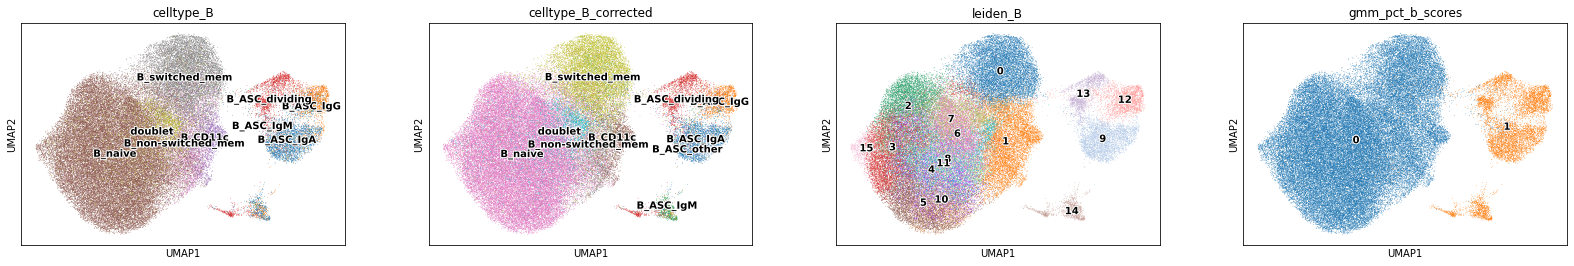

In [21]:
sc.pl.umap(bdata, color = ['celltype_B', 'celltype_B_corrected', 'leiden_B', 'gmm_pct_b_scores'], legend_loc = 'on data', legend_fontoutline = 2)

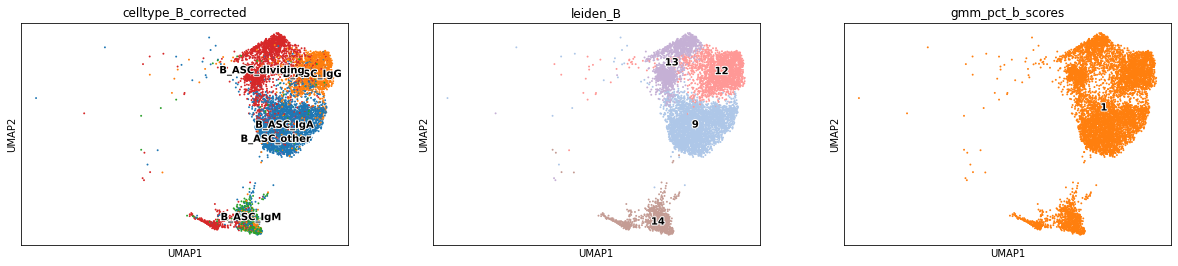

In [13]:
asc = bdata[bdata.obs['leiden_B'].isin(['9', '13', '12', '14']) & bdata.obs['gmm_pct_b_scores'].isin([1])].copy()
sc.pl.umap(asc, color = ['celltype_B_corrected', 'leiden_B', 'gmm_pct_b_scores'], legend_loc = 'on data', legend_fontoutline = 2)

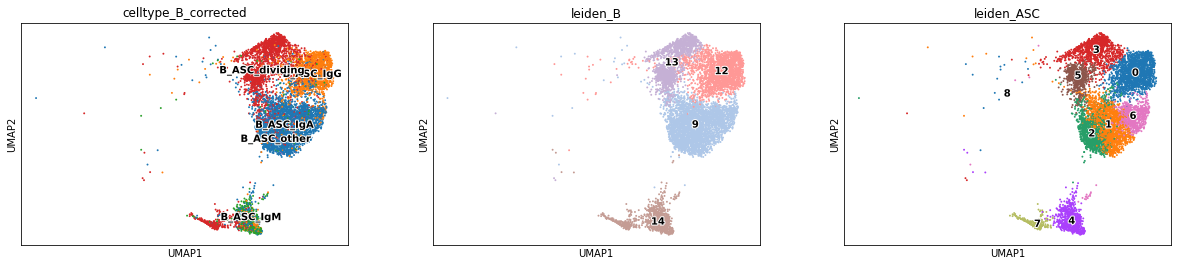

In [18]:
sc.tl.leiden(asc, key_added = 'leiden_ASC', resolution = .5)
sc.pl.umap(asc, color = ['celltype_B_corrected', 'leiden_B', 'leiden_ASC'], legend_loc = 'on data', legend_fontoutline = 2)

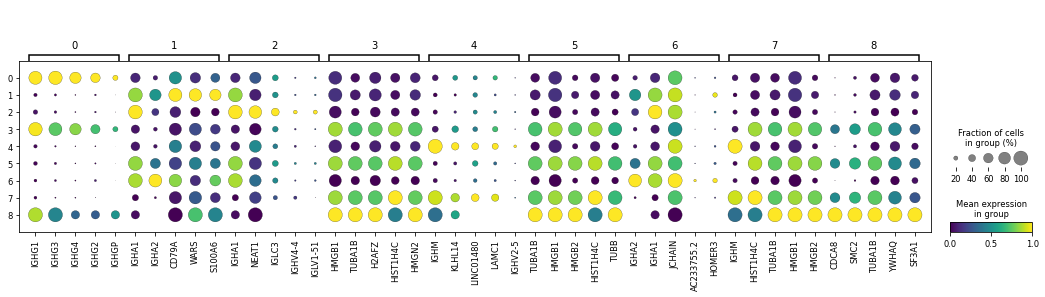

In [19]:
sc.tl.rank_genes_groups(asc, groupby = 'leiden_ASC')
sc.pl.rank_genes_groups_dotplot(asc, min_logfoldchange =1, n_genes=5, standard_scale = 'var',  color_map = 'viridis', dendrogram = False)

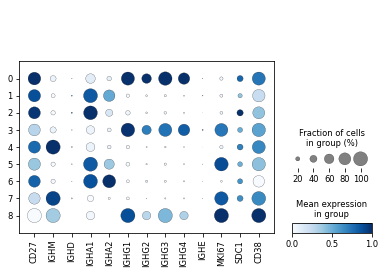

In [20]:
sc.pl.dotplot(asc, ['CD27','IGHM','IGHD','IGHA1', 'IGHA2', 'IGHG1','IGHG2','IGHG3','IGHG4','IGHE', 'MKI67', 'SDC1', 'CD38'], groupby = 'leiden_ASC', color_map = 'Blues', standard_scale = 'var')

/nfs/team297/kt16/Softwares/conda/envs/scvi-env/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'celltype_B' as categorical


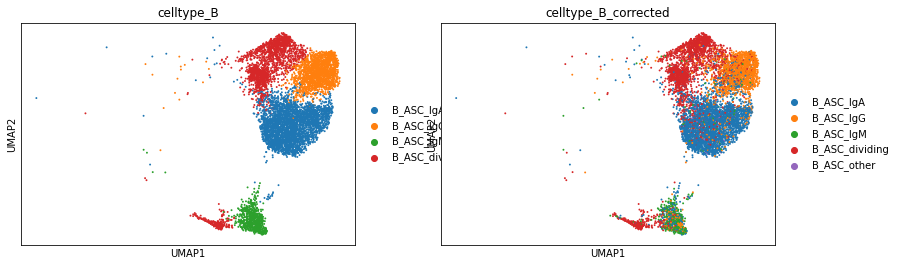

In [23]:
new_dict = {'0':'B_ASC_IgG',
'1':'B_ASC_IgA',
'2':'B_ASC_IgA',
'3':'B_ASC_dividing',
'4':'B_ASC_IgM',
'5':'B_ASC_dividing',
'6':'B_ASC_IgA',
'7':'B_ASC_dividing',
'8':'B_ASC_dividing',}
asc.obs['celltype_B'] = [new_dict[x] for x in asc.obs['leiden_ASC']]
sc.pl.umap(asc, color = ['celltype_B', 'celltype_B_corrected'])

In [24]:
pd.crosstab(asc.obs['celltype_B'], asc.obs['isotype_summary'])

isotype_summary,IgA,IgD,IgE,IgG,IgM,No_contig,unassigned
celltype_B,,,,,,,
B_ASC_IgA,2456,36,1,39,10,883,2
B_ASC_IgG,74,0,0,1109,2,653,0
B_ASC_IgM,23,0,0,9,474,274,0
B_ASC_dividing,611,6,0,668,157,546,2


In [173]:
asc.obs['celltype_B_corrected'] = asc.obs['celltype_B'].astype('object')

In [25]:
for i in asc.obs.index:
    iso = asc.obs.loc[i, 'isotype_summary']
    if asc.obs.loc[i, 'celltype_B_corrected'] == 'B_ASC_IgA':
        if iso in ['IgA', 'Multi', 'No_contig', 'unassigned']:
            continue
        if iso in ['IgE', 'IgD']:
            asc.obs.at[i, 'celltype_B_corrected'] = 'B_ASC_other'
        if iso == 'IgM':
            asc.obs.at[i, 'celltype_B_corrected'] = 'B_ASC_IgM'
        if iso == 'IgG':
            asc.obs.at[i, 'celltype_B_corrected'] = 'B_ASC_IgG'
    if asc.obs.loc[i, 'celltype_B_corrected'] == 'B_ASC_IgG':
        if iso in ['IgG', 'Multi', 'No_contig', 'unassigned']:
            continue
        if iso in ['IgE', 'IgD']:
            asc.obs.at[i, 'celltype_B_corrected'] = 'B_ASC_other'
        if iso == 'IgM':
            asc.obs.at[i, 'celltype_B_corrected'] = 'B_ASC_IgM'
        if iso == 'IgA':
            asc.obs.at[i, 'celltype_B_corrected'] = 'B_ASC_IgA'
    if asc.obs.loc[i, 'celltype_B_corrected'] == 'B_ASC_IgM':
        if iso in ['IgM', 'Multi', 'No_contig', 'unassigned']:
            continue
        if iso in ['IgE', 'IgD']:
            asc.obs.at[i, 'celltype_B_corrected'] = 'B_ASC_other'
        if iso == 'IgG':
            asc.obs.at[i, 'celltype_B_corrected'] = 'B_ASC_IgG'
        if iso == 'IgA':
            asc.obs.at[i, 'celltype_B_corrected'] = 'B_ASC_IgA'

In [26]:
pd.crosstab(asc.obs['celltype_B_corrected'], asc.obs['isotype_summary'])

isotype_summary,IgA,IgD,IgE,IgG,IgM,No_contig,unassigned
celltype_B_corrected,,,,,,,
B_ASC_IgA,2430,0,0,0,0,965,2
B_ASC_IgG,0,0,0,1116,0,675,0
B_ASC_IgM,0,0,0,0,449,90,0
B_ASC_dividing,734,7,0,709,194,626,2
B_ASC_other,0,35,1,0,0,0,0


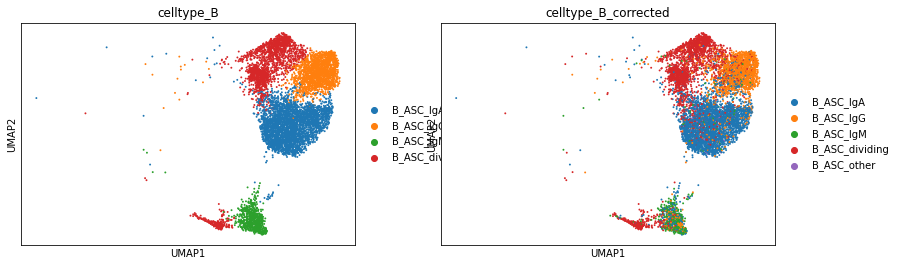

In [27]:
sc.pl.umap(asc, color = ['celltype_B', 'celltype_B_corrected'])

In [33]:
adata.obs['celltype_B'] = adata.obs['celltype_B'].astype('object')
adata.obs['celltype_B_corrected'] = adata.obs['celltype_B_corrected'].astype('object')
bdata.obs['celltype_B'] = bdata.obs['celltype_B'].astype('object')
bdata.obs['celltype_B_corrected'] = bdata.obs['celltype_B_corrected'].astype('object')
adata.obs['celltype_B'].update(asc.obs['celltype_B'])
adata.obs['celltype_B_corrected'].update(asc.obs['celltype_B_corrected'])
bdata.obs['celltype_B'].update(asc.obs['celltype_B'])
bdata.obs['celltype_B_corrected'].update(asc.obs['celltype_B_corrected'])

/nfs/team297/kt16/Softwares/conda/envs/scvi-env/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'celltype_B' as categorical
/nfs/team297/kt16/Softwares/conda/envs/scvi-env/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'celltype_B_corrected' as categorical


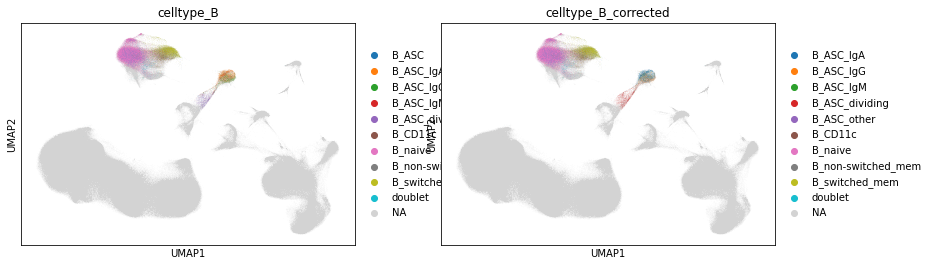

In [34]:
sc.pl.umap(adata, color = ['celltype_B', 'celltype_B_corrected'])

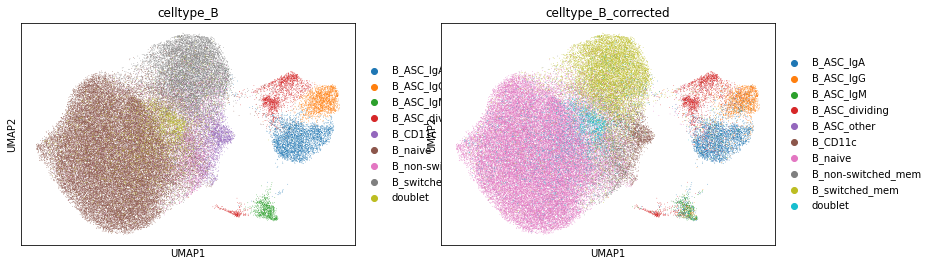

In [36]:
sc.pl.umap(bdata, color = ['celltype_B', 'celltype_B_corrected'])

In [37]:
# save
bdata.write_h5ad('h5ad/df.fil3_gex_bcells_no_CLL_vdj.h5ad', compression = 'gzip')

In [38]:
adata.write_h5ad('h5ad/df.fil3_gex_kt.h5ad', compression = 'gzip')